# Feature Selection

     Features       Score
27   absences  113.608331
25      goout   29.668753
14   failures   18.284011
1         sex   17.688609
13  studytime   10.045501
15  schoolsup    9.561991
0      school    9.000391
28         G1    8.354507
5     Pstatus    7.280239
29         G2    6.619095


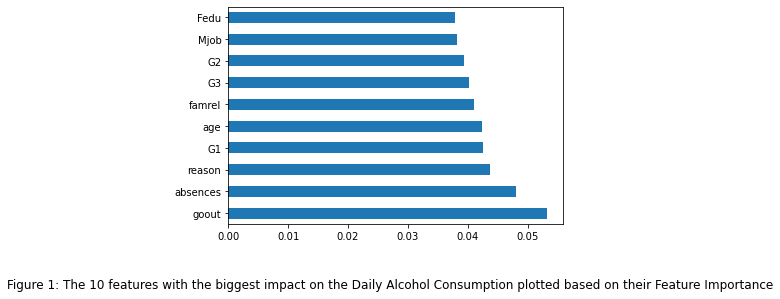

     Features       Score
27   absences  113.608331
25      goout   29.668753
14   failures   18.284011
1         sex   17.688609
13  studytime   10.045501
15  schoolsup    9.561991
0      school    9.000391
28         G1    8.354507
5     Pstatus    7.280239
29         G2    6.619095


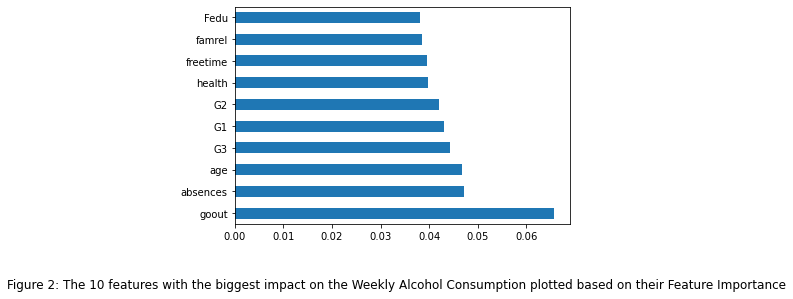

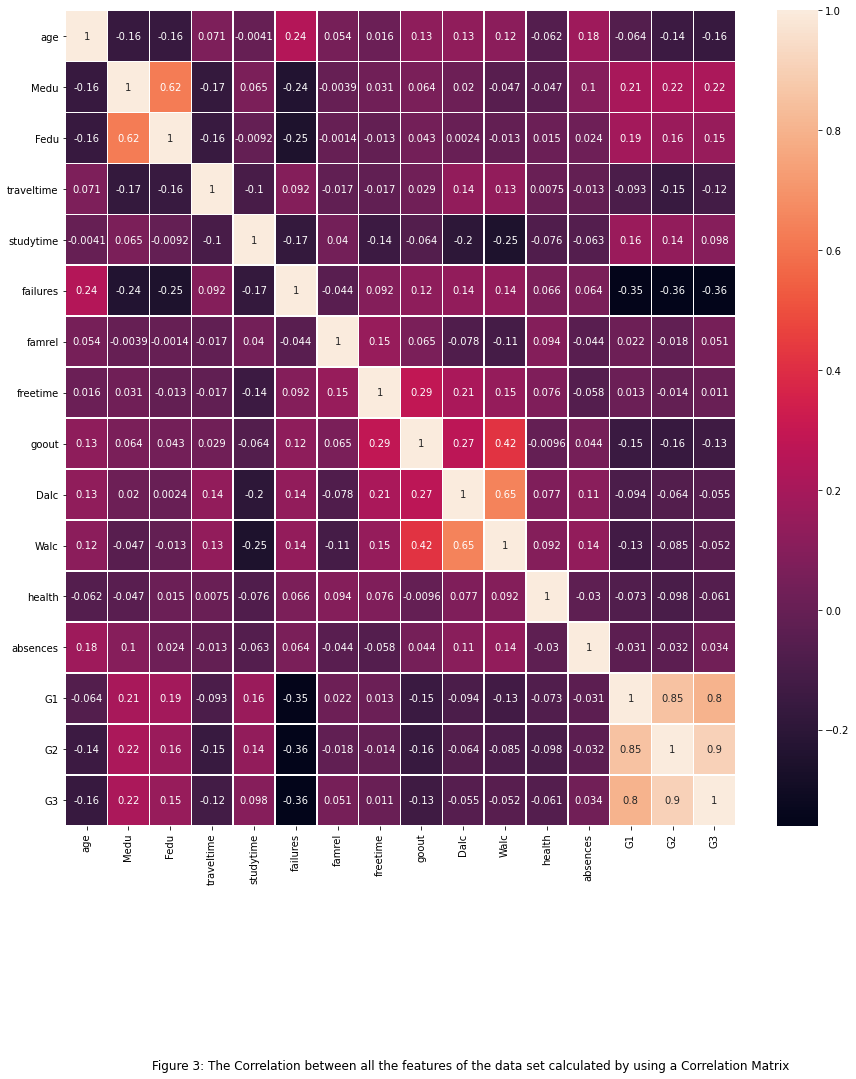

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("data.xlsx")
yDay = data.iloc[:,26:27]    #target column Daily Alcohol Consumption
yWeek = data.iloc[:,27:28]    #target column Weekly Alcohol Consumption
X = data.drop(['Dalc', 'Walc'], axis = 1) #feature columns

#Replace string variables with numbers
#school
school = {'GP': 0, 'MS': 1}
X.school = [school[item] for item in X.school]
#sex
sex = {'M': 0, 'F': 1}
X.sex = [sex[item] for item in X.sex]
#address
address = {'U': 0, 'R': 1}
X.address = [address[item] for item in X.address]
#famsize
famsize = {'LE3': 0, 'GT3': 1}
X.famsize = [famsize[item] for item in X.famsize]
#Pstatus
Pstatus = {'T': 0, 'A': 1}
X.Pstatus = [Pstatus[item] for item in X.Pstatus]
#Mjob
Mjob = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
X.Mjob = [Mjob[item] for item in X.Mjob]
#Fjob
Fjob = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
X.Fjob = [Fjob[item] for item in X.Fjob]
#reason
reason = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
X.reason = [reason[item] for item in X.reason]
#guardian
guardian = {'mother': 0, 'father': 1, 'other': 2}
X.guardian = [guardian[item] for item in X.guardian]
#schoolsup
schoolsup = {'no': 0, 'yes': 1}
X.schoolsup = [schoolsup[item] for item in X.schoolsup]
#famsup
famsup = {'no': 0, 'yes': 1}
X.famsup = [famsup[item] for item in X.famsup]
#paid
paid = {'no': 0, 'yes': 1}
X.paid = [paid[item] for item in X.paid]
#activities
activities = {'no': 0, 'yes': 1}
X.activities = [activities[item] for item in X.activities]
#nursery
nursery = {'no': 0, 'yes': 1}
X.nursery = [nursery[item] for item in X.nursery]
#higher
higher = {'no': 0, 'yes': 1}
X.higher = [higher[item] for item in X.higher]
#internet
internet = {'no': 0, 'yes': 1}
X.internet = [internet[item] for item in X.internet]
#romantic
romantic = {'no': 0, 'yes': 1}
X.romantic = [romantic[item] for item in X.romantic]

#Extract the 10 features with the biggest impact on Daily Alcohol Consumption by applying Univariate Selection
features = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,yDay)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
#Print the 10 features and their respective scores by concatenating them into a list
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#Extract the 10 features with the biggest impact on Daily Alcohol Consumption by applying Feature Improtance
clf = ExtraTreesClassifier()
clf.fit(X, yDay.to_numpy().ravel())
#Print the 10 features in a graph based on their Feature Importance
importances = pd.Series(clf.feature_importances_, index = X.columns)
importances.nlargest(10).plot(kind='barh')
plt.figtext(0.5, -0.1, 'Figure 1: The 10 features with the biggest impact on the Daily Alcohol Consumption plotted based on their Feature Importance', wrap = True, horizontalalignment="center", fontsize = 12)
plt.show()

#Extract the 10 features with the biggest impact on Weekly Alcohol Consumption by applying Univariate Selection
features = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,yWeek)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
#Print the 10 features and their respective scores by concatenating them into a list
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#Extract the 10 features with the biggest impact on Weekly Alcohol Consumption by applying Feature Improtance
clf = ExtraTreesClassifier()
clf.fit(X, yWeek.to_numpy().ravel())
#Print the 10 features in a graph based on their Feature Importance
importances = pd.Series(clf.feature_importances_, index = X.columns)
importances.nlargest(10).plot(kind='barh')
plt.figtext(0.5, -0.1, 'Figure 2: The 10 features with the biggest impact on the Weekly Alcohol Consumption plotted based on their Feature Importance', wrap = True, horizontalalignment="center", fontsize = 12)
plt.show()

#Extract the Correlation between all the features using a Correlation Matrix
correlations = data.corr()
features = correlations.index
#Print the Correlation between all features using a heatmap
plt.figure(figsize=(15, 15))
plt.figtext(0.5, -0.1, 'Figure 3: The Correlation between all the features of the data set calculated by using a Correlation Matrix', wrap = True, horizontalalignment="center", fontsize = 12)
heatmap = sns.heatmap(data[features].corr(), annot=True, linewidths=.5)
plt.show()

# Feature Extraction